In [37]:
# ==========================================================
# 📘 STEP 1: IMPORTING REQUIRED LIBRARIES
# ==========================================================
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pickle

In [29]:
#Loading The Dataset
df = pd.read_csv('loan_approval.csv')
df

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False
...,...,...,...,...,...,...,...,...
1995,James Schaefer,Robertton,92163,770,12251,13,85.0,True
1996,Diana Lin,New Frank,38799,635,48259,17,40.0,False
1997,Brandon Meyer,East Haley,41957,763,16752,5,60.0,True
1998,Jason Price,Adamland,139022,360,24031,35,55.0,False


In [4]:
df.columns

Index(['name', 'city', 'income', 'credit_score', 'loan_amount',
       'years_employed', 'points', 'loan_approved'],
      dtype='object')

In [30]:
# ==========================================================
# 🧩 DEFINING FEATURES (X) AND TARGET (y)
# ==========================================================
# Independent variables (input features)
x = df[['income', 'credit_score', 'loan_amount', 'years_employed', 'points']]

# Dependent variable (target output)
y = df['loan_approved']


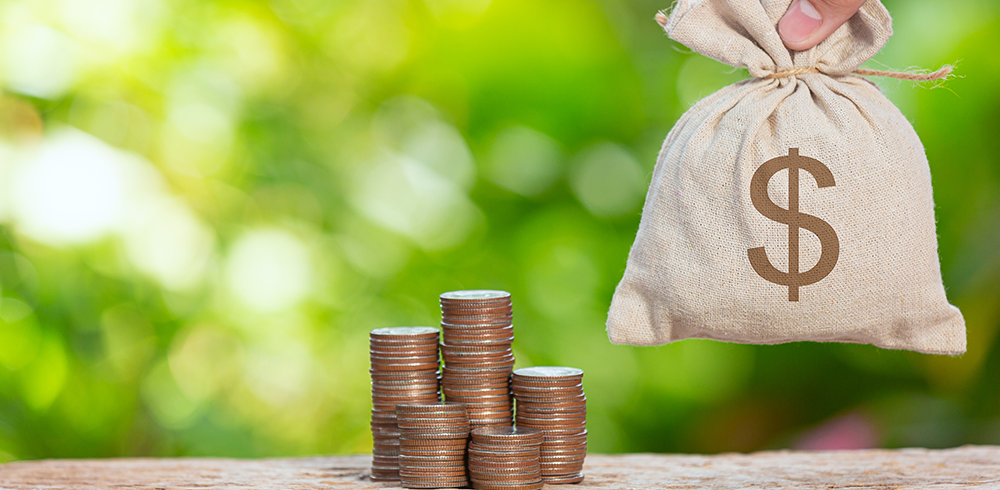

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [31]:
# ==========================================================
# ✂️ SPLITTING THE DATA INTO TRAINING AND TESTING SETS
# ==========================================================
# 80% of the data is used for training the model and 20% for testing.
# random_state=12 ensures reproducible (same) splits every time the code runs.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)


In [32]:
# ==========================================================
# ⚙️ INITIALIZING MACHINE LEARNING MODELS
# ==========================================================
# Creating instances of different classification algorithms
# Each model will learn patterns from the training data in its own way.

model_knn = KNeighborsClassifier(n_neighbors=9)   # K-Nearest Neighbors with 9 neighbors
model_nb  = GaussianNB()                          # Naive Bayes Classifier
model_lr  = LogisticRegression(max_iter=1000)     # Logistic Regression (with higher iteration limit for convergence)
model_svm = SVC(kernel='linear')                  # Support Vecto_


In [35]:
# Training all models on the training dataset
model_knn.fit(x_train, y_train)
model_nb.fit(x_train, y_train)
model_lr.fit(x_train, y_train)
model_svm.fit(x_train, y_train)


SVC(kernel='linear')

In [40]:
# Testing the models on the test dataset
pred_knn = model_knn.predict(x_test)
pred_nb  = model_nb.predict(x_test)
pred_lr  = model_lr.predict(x_test)
pred_svm = model_svm.predict(x_test)

# Now we can check how well each model predicted the outcomes


In [24]:
# ==========================================================
# 📝 EVALUATION REPORT
# ==========================================================
# Displaying performance metrics of the KNN model
print(classification_report(y_test, pred_knn))


              precision    recall  f1-score   support

       False       0.61      0.76      0.68       270
        True       0.60      0.43      0.50       230

    accuracy                           0.61       500
   macro avg       0.60      0.59      0.59       500
weighted avg       0.61      0.61      0.59       500



In [25]:
# Displaying performance metrics of the Naive Bayes model
print(classification_report(y_test, pred_nb))


              precision    recall  f1-score   support

       False       0.93      0.97      0.95       270
        True       0.97      0.92      0.94       230

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



In [26]:
# Displaying performance metrics of the Logistic Regression model
print(classification_report(y_test, pred_lr))


              precision    recall  f1-score   support

       False       0.85      0.83      0.84       270
        True       0.81      0.83      0.82       230

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



In [27]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

       False       0.62      0.87      0.73       270
        True       0.72      0.38      0.50       230

    accuracy                           0.65       500
   macro avg       0.67      0.63      0.61       500
weighted avg       0.67      0.65      0.62       500



In [39]:
# saving The Best Model In the Pickle File
with open("Best_model.pkl",'wb') as f:
  pickle.dump(model_lr,f)